# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv')
df_seoul_business = pd.read_csv('df_seoul_business.csv')
df_seoul_people = pd.read_csv('df_seoul_people.csv')

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station.head(3)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504


In [7]:
df_seoul_moving.head(3)

,도착 시군구 코드,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),이동인구(합)
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87


In [11]:
df_seoul_business.head(3)

,자치구,택시운송업 사업체수,택시운송업 종업자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종업자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종업자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종업자수,두발미용업 사업체수,...,커피전문점 사업체수,커피전문점 종업자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종업자수,기타주점업 사업체수,기타주점업 종업자수,일반 교과 학원 사업체수,일반 교과 학원 종업자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종업자수
0,종로구,7,7,230,982,12,12,57,96,28,...,124,525,2,18,74,177,9,34,45,220
1,종로구,5,5,42,145,4,4,9,10,28,...,66,243,2,3,3,8,9,34,7,33
2,종로구,22,22,26,100,9,9,17,26,8,...,24,62,3,6,7,23,16,59,3,15


In [10]:
df_seoul_people.head(3)

,자치구,세대,인구합계,남자,여자,한국인 합계,한국인 남자,한국인 여자,등록외국인 합계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
0,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
1,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
2,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [12]:
data = pd.merge(standard, df_seoul_bus_station, on='자치구')
data = pd.merge(data, df_seoul_moving, on='도착 시군구 코드')
data = pd.merge(data, df_seoul_business, on='자치구')
data = pd.merge(data, df_seoul_people, on='자치구')

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.head(3)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),...,남자,여자,한국인 합계,한국인 남자,한국인 여자,등록외국인 합계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
0,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,...,114571,121947,222169,106735,115434,14349,7836,6513,2.0,39461
1,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,...,114571,121947,222169,106735,115434,14349,7836,6513,2.0,39461
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,...,114571,121947,222169,106735,115434,14349,7836,6513,2.0,39461


In [31]:
df = data.drop('도착 시군구 코드', axis=1)
df.corr()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(평균),이동 시간 합계(분),이동인구(합),...,남자,여자,한국인 합계,한국인 남자,한국인 여자,등록외국인 합계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
정류장수,1.000000,0.546528,0.567747,0.570404,-0.051555,-0.040757,0.032544,0.311761,0.469235,0.361653,...,0.337040,0.380233,0.357991,0.336218,0.376936,-0.069582,-0.072869,-0.062619,0.150264,0.353297
노선수,0.546528,1.000000,0.744656,0.741555,0.503637,0.491939,-0.624221,0.019939,0.325923,0.215326,...,-0.122324,-0.099211,-0.131450,-0.141876,-0.121436,0.421933,0.356650,0.473086,-0.216054,-0.171888
승차총승객수,0.567747,0.744656,1.000000,0.996550,0.602519,0.594967,-0.119805,0.487397,0.617175,0.594036,...,0.401276,0.403989,0.389790,0.389176,0.389144,0.129708,0.098260,0.157901,-0.068456,0.317152
하차총승객수,0.570404,0.741555,0.996550,1.000000,0.608733,0.612092,-0.113188,0.469192,0.606367,0.570230,...,0.414727,0.413561,0.399839,0.401428,0.397131,0.152278,0.114767,0.186024,-0.108033,0.332878
승차평균승객수,-0.051555,0.503637,0.602519,0.608733,1.000000,0.990769,-0.342293,-0.011107,0.153692,0.110454,...,-0.135415,-0.172443,-0.176456,-0.158064,-0.192852,0.445774,0.411526,0.461768,-0.479456,-0.216010
하차평균승객수,-0.040757,0.491939,0.594967,0.612092,0.990769,1.000000,-0.326035,-0.022609,0.153158,0.089243,...,-0.100121,-0.141568,-0.145219,-0.124117,-0.164208,0.469421,0.424891,0.495540,-0.530552,-0.179007
평균 이동 시간(분),0.032544,-0.624221,-0.119805,-0.113188,-0.342293,-0.326035,1.000000,0.427631,0.026353,0.189464,...,0.634064,0.623711,0.647579,0.651425,0.642022,-0.521063,-0.451601,-0.572006,0.337321,0.713003
이동인구(평균),0.311761,0.019939,0.487397,0.469192,-0.011107,-0.022609,0.427631,1.000000,0.860424,0.962034,...,0.768070,0.796183,0.786788,0.771046,0.798845,-0.288497,-0.246702,-0.320359,0.437985,0.593535
이동 시간 합계(분),0.469235,0.325923,0.617175,0.606367,0.153692,0.153158,0.026353,0.860424,1.000000,0.941075,...,0.570319,0.613648,0.587618,0.565604,0.606072,-0.063940,-0.067991,-0.056414,0.212776,0.373641
이동인구(합),0.361653,0.215326,0.594036,0.570230,0.110454,0.089243,0.189464,0.962034,0.941075,1.000000,...,0.639674,0.675395,0.657997,0.638632,0.673791,-0.174029,-0.146900,-0.195349,0.351450,0.439461


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
    - 노선수가 많을 수록 승하차 수가 많다?

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [19]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

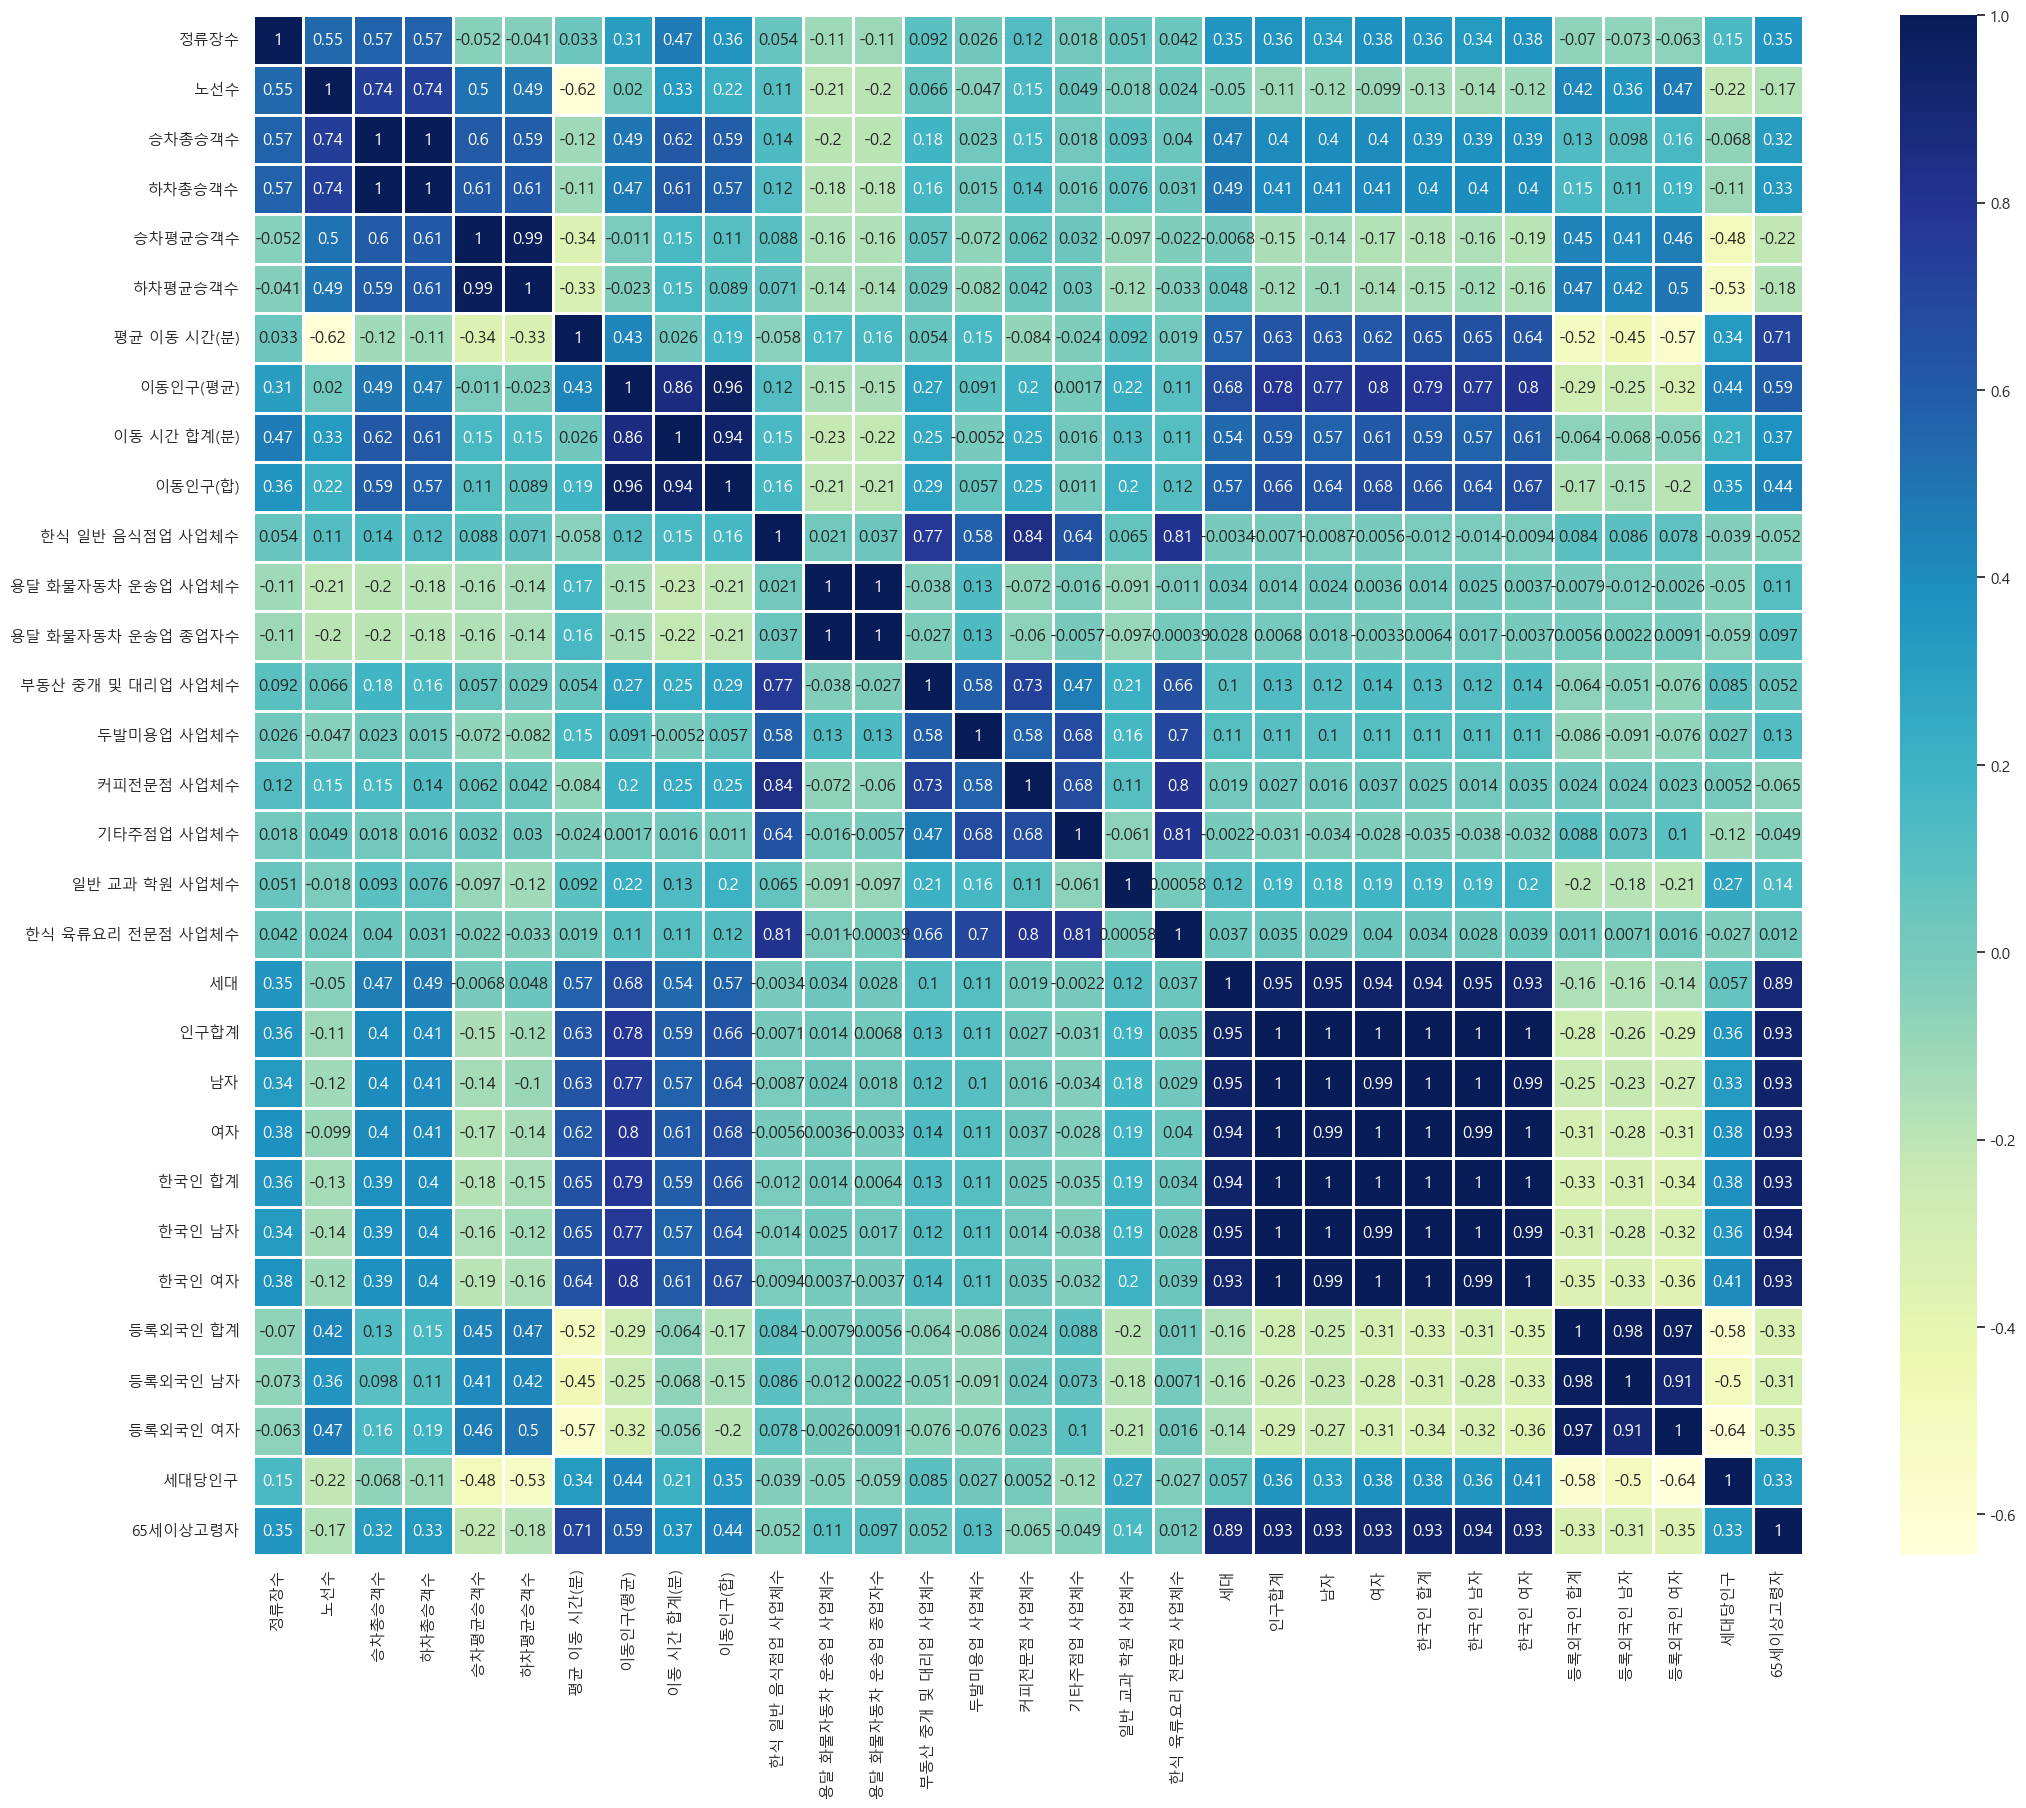

In [32]:
corr = df.corr()

plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")
plt.show()

In [34]:
len(list(df))

43

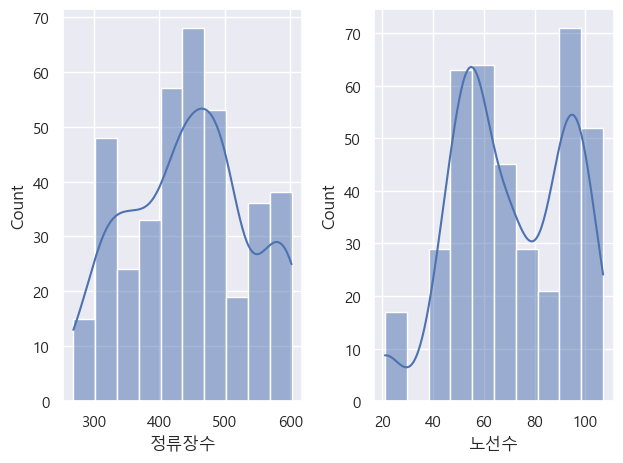

In [35]:
plt.subplot(1, 2, 1)
sns.histplot(df['정류장수'], kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df['노선수'], kde=True)

plt.tight_layout()
plt.show()

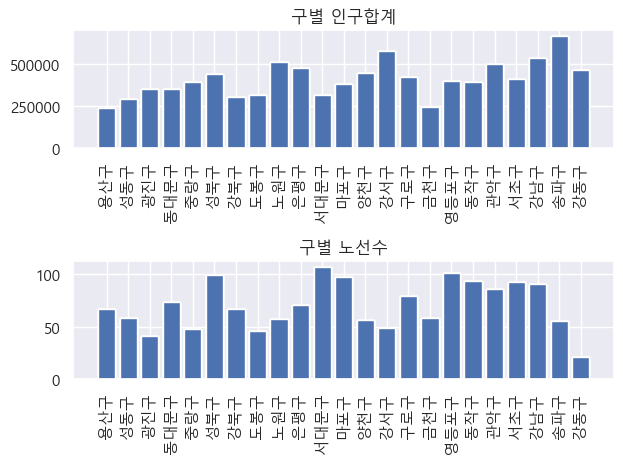

In [69]:
plt.subplot(2, 1, 1)
plt.bar(df['자치구'], df['인구합계'])
plt.xticks(rotation=90)
plt.title('구별 인구합계')

plt.subplot(2, 1, 2)
plt.bar(df['자치구'], df['노선수'])
plt.xticks(rotation=90)
plt.title('구별 노선수')

plt.tight_layout()
plt.show()

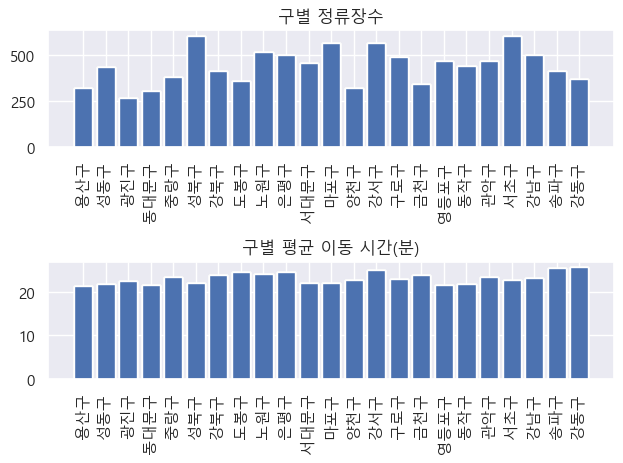

In [68]:
plt.subplot(2, 1, 1)
plt.bar(df['자치구'], df['정류장수'])
plt.xticks(rotation=90)
plt.title('구별 정류장수')

plt.subplot(2, 1, 2)
plt.bar(df['자치구'], df['평균 이동 시간(분)'])
plt.xticks(rotation=90)
plt.title('구별 평균 이동 시간(분)')

plt.tight_layout()
plt.show()

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [41]:
list(df)

['자치구',
 '정류장수',
 '노선수',
 '승차총승객수',
 '하차총승객수',
 '승차평균승객수',
 '하차평균승객수',
 '평균 이동 시간(분)',
 '이동인구(평균)',
 '이동 시간 합계(분)',
 '이동인구(합)',
 '택시운송업 사업체수',
 '택시운송업 종업자수',
 '한식 일반 음식점업 사업체수',
 '한식 일반 음식점업 종업자수',
 '용달 화물자동차 운송업 사업체수',
 '용달 화물자동차 운송업 종업자수',
 '부동산 중개 및 대리업 사업체수',
 '부동산 중개 및 대리업 종업자수',
 '두발미용업 사업체수',
 '두발미용업 종업자수',
 '커피전문점 사업체수',
 '커피전문점 종업자수',
 '남녀용 겉옷 및 셔츠 도매업 사업체수',
 '남녀용 겉옷 및 셔츠 도매업 종업자수',
 '기타주점업 사업체수',
 '기타주점업 종업자수',
 '일반 교과 학원 사업체수',
 '일반 교과 학원 종업자수',
 '한식 육류요리 전문점 사업체수',
 '한식 육류요리 전문점 종업자수',
 '세대',
 '인구합계',
 '남자',
 '여자',
 '한국인 합계',
 '한국인 남자',
 '한국인 여자',
 '등록외국인 합계',
 '등록외국인 남자',
 '등록외국인 여자',
 '세대당인구',
 '65세이상고령자']

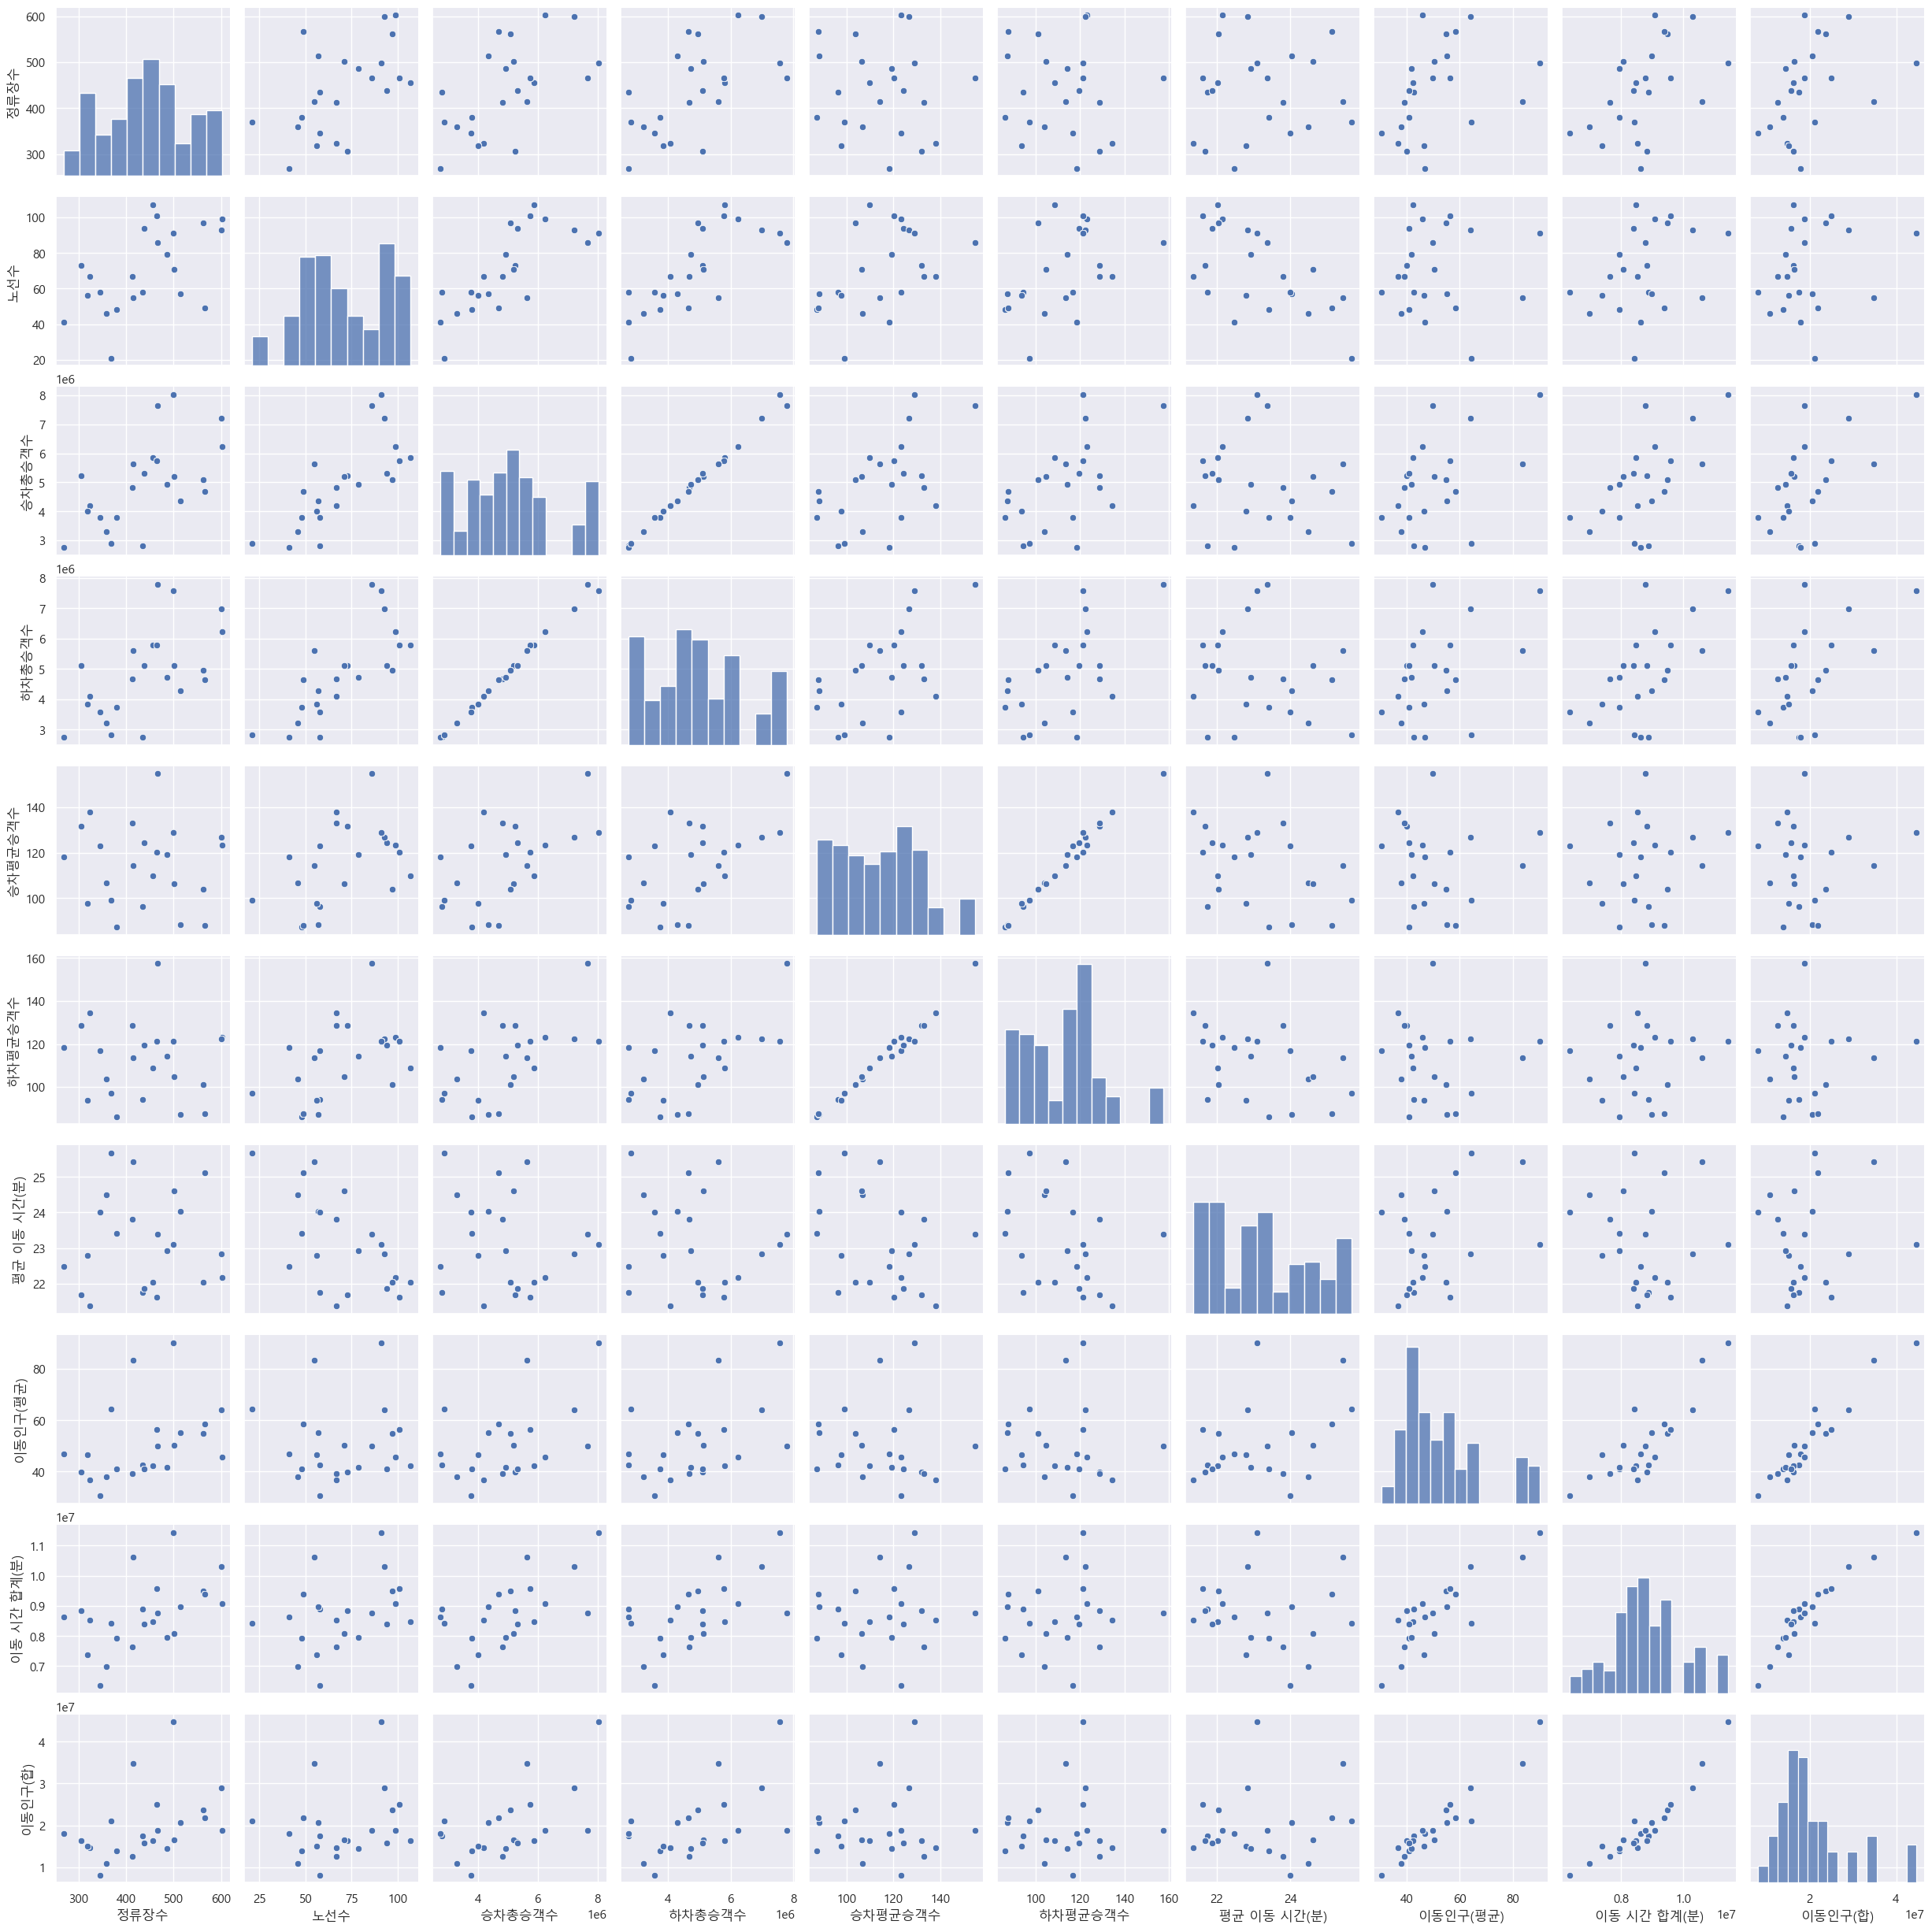

In [43]:
cols = ['자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수','평균 이동 시간(분)', '이동인구(평균)', '이동 시간 합계(분)', '이동인구(합)']
sns.pairplot(df[cols])
plt.show()

In [ ]:
target = 

### 1) 노선수가 많을수록 승하차수가 많다?

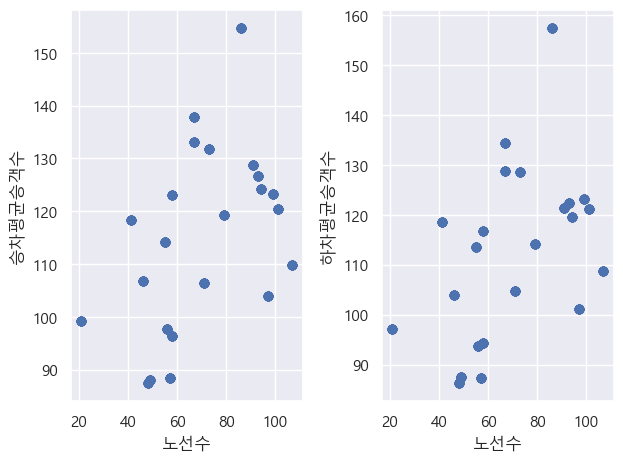

In [53]:
plt.subplot(1, 2, 1)
plt.scatter(df['노선수'], df['승차평균승객수'])
plt.xlabel('노선수')
plt.ylabel('승차평균승객수')

plt.subplot(1, 2, 2)
plt.scatter(df['노선수'], df['하차평균승객수'])
plt.xlabel('노선수')
plt.ylabel('하차평균승객수')

plt.tight_layout()
plt.show()

In [51]:
import scipy.stats as spst

spst.pearsonr(df['노선수'], df['승차평균승객수'])

PearsonRResult(statistic=0.503637132393496, pvalue=1.5439802840946088e-26)

In [52]:
spst.pearsonr(df['노선수'], df['하차평균승객수'])

PearsonRResult(statistic=0.49193864595426307, pvalue=3.2108404511398078e-25)

### 2) 인구수와 승하차평균수는 관련이 있다?

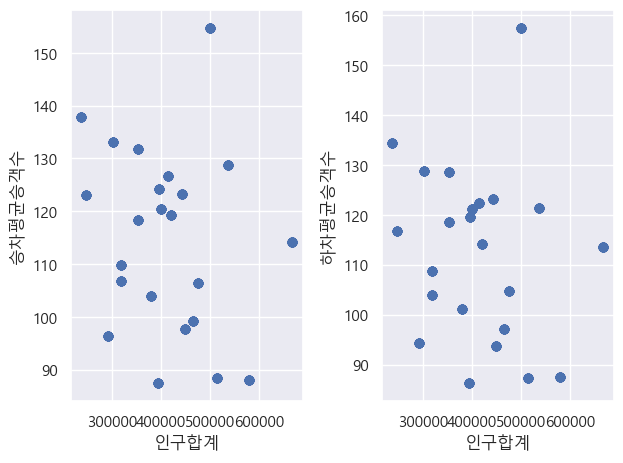

In [54]:
plt.subplot(1, 2, 1)
plt.scatter(df['인구합계'], df['승차평균승객수'])
plt.xlabel('인구합계')
plt.ylabel('승차평균승객수')

plt.subplot(1, 2, 2)
plt.scatter(df['인구합계'], df['하차평균승객수'])
plt.xlabel('인구합계')
plt.ylabel('하차평균승객수')

plt.tight_layout()
plt.show()

In [55]:
spst.pearsonr(df['인구합계'], df['승차평균승객수'])

PearsonRResult(statistic=-0.15496607024525336, pvalue=0.0021189774570110937)

In [57]:
spst.pearsonr(df['인구합계'], df['하차평균승객수'])

PearsonRResult(statistic=-0.12190724509585973, pvalue=0.01587207630696228)

### 3) 노선수와 이동인구간의 관계?

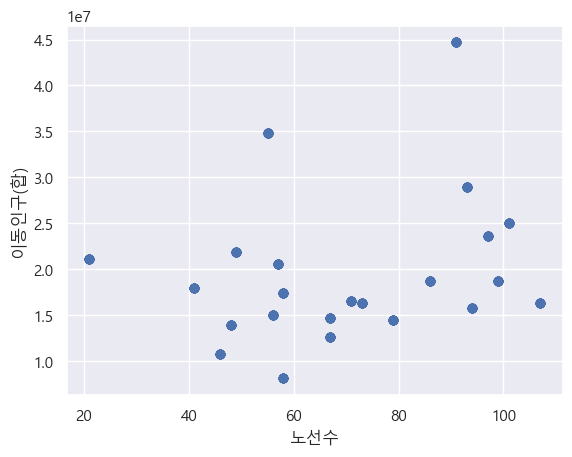

In [62]:
plt.scatter(df['노선수'], df['이동인구(합)'])
plt.xlabel('노선수')
plt.ylabel('이동인구(합)')

plt.show()

In [61]:
spst.pearsonr(df['노선수'], df['이동인구(합)'])

PearsonRResult(statistic=0.21532620742147593, pvalue=1.7496901303434244e-05)

### 4) 노선수와 세대수간의 관계?

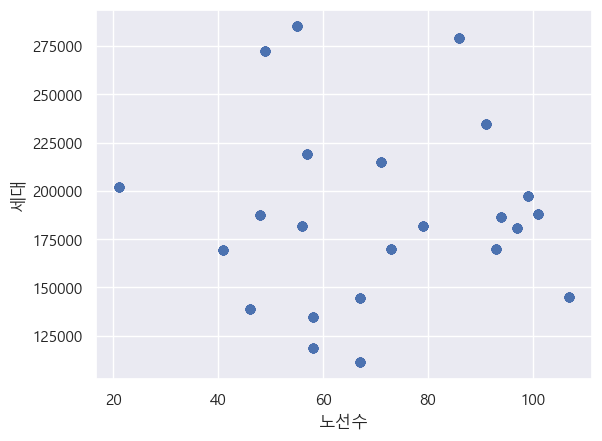

In [65]:
plt.scatter(df['노선수'], df['세대'])
plt.xlabel('노선수')
plt.ylabel('세대')

plt.show()

In [67]:
spst.pearsonr(df['노선수'], df['세대'])

PearsonRResult(statistic=-0.05020057044113456, pvalue=0.32212608386987707)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [50]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?